In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


In [2]:
from platform import python_version
print(python_version())

3.11.8


In [3]:
#pip install matplotlib

In [4]:
heart_data=pd.read_csv(r'C:\Users\NDE\Downloads\heart.csv')

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [6]:
heart_data=heart_data.rename(columns={'thalach':'thal'})

In [7]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thal,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [8]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thal,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thal        0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thal      1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
heart_data['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [13]:
#Feature Selection Process using Filter method
#data = heart_data.values
#X=data[:,0:13]
#Y=data[:,13]

In [14]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2

In [15]:
#chi_best = SelectKBest(score_func=chi2)
#k_best = chi_best.fit(X,Y)

In [16]:
#np.set_printoptions()
#print(k_best.scores_)
#k_features = k_best.transform(X)

In [17]:
#Splitting Training_Test set
X = heart_data.drop(columns={'target', 'fbs'})
Y = heart_data['target']


In [19]:
X.head()

,age,sex,cp,trestbps,chol,restecg,thal,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,1,168,0,1.0,2,2,3
1,53,1,0,140,203,0,155,1,3.1,0,0,3
2,70,1,0,145,174,1,125,1,2.6,0,0,3
3,61,1,0,148,203,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,106,0,1.9,1,3,2


In [20]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [21]:
print(Y.shape)

(1025,)


In [22]:
#Training the model
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, stratify=Y, random_state=2)

In [23]:
model = LogisticRegression()

In [24]:
model.fit(X_train, Y_train)

C:\Users\NDE\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
X_train_prediction = model.predict(X_train)
Accuracy = accuracy_score(X_train_prediction, Y_train)


In [26]:
print(Accuracy*100)

85.24390243902438


In [27]:
X_test_prediction=model.predict(X_test)
Accuracy_test=accuracy_score(X_test_prediction, Y_test)

In [28]:
print(Accuracy_test*100)

80.48780487804879


In [29]:
#Tunning the logistic regressor
#param_grid = [
 #   {'penalty':['l1','l2','elasticnet','none'],
  #  'C' : np.logspace(-4,4,20),
   # 'solver': ['lbfgs','newton-cg','liblinear','sag','saga'],
    #'max_iter'  : [100,1000,2500,5000]
#}
#]

In [30]:
#from sklearn.model_selection import GridSearchCV
#clf = GridSearchCV(model,param_grid = param_grid, cv = 3, verbose=True,n_jobs=-1)
#clf

In [31]:
#best_clf = clf.fit(X,Y)
#best_clf.best_estimator_
#print(f'Accuracy - : {best_clf.score(X,Y):.3f}')

In [32]:
cm = confusion_matrix(Y_test, X_test_prediction)

In [33]:
print(cm)

[[72 28]
 [12 93]]


In [34]:
model.classes_

array([0, 1], dtype=int64)

In [35]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels =['No Disease','Disease'])

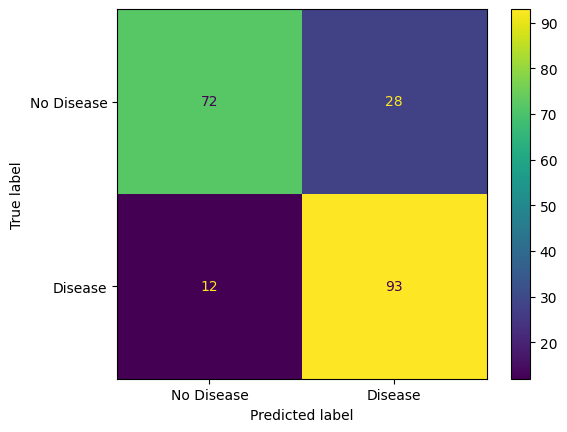

In [36]:
cm_display.plot()

In [37]:
#To extract TP,FP,TN,FN

In [38]:
tn, fp, fn, tp = confusion_matrix(Y_test, X_test_prediction).ravel()
tn, fp, fn, tp

(72, 28, 12, 93)

In [39]:
matrix = classification_report(Y_test, X_test_prediction)
print('Classifivation Report: \n', matrix)

Classifivation Report: 
               precision    recall  f1-score   support

           0       0.86      0.72      0.78       100
           1       0.77      0.89      0.82       105

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



In [41]:
#Building Predictive model
input_heart = (46,1,0,120,249,0,144,0,0.8,2,0,3)
#Conversion to numpy array
input_to_array_heart = np.asarray(input_heart)
#Reshaping the data
input_reshape_heart = input_to_array_heart.reshape(1,-1)

In [42]:
#Predict input
predict = model.predict(input_reshape_heart)

C:\Users\NDE\anaconda3\envs\Data_Science\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [43]:
print(predict)
if (predict[0]==0):
    print("The person has no heart disease")
else:
    print("The person has Heart disease, please visit one of the cardiolofist")

[0]
The person has no heart disease


In [43]:
#Saving Trained model for deployment

In [44]:
import pickle
filename = 'heart_trained_model.sav'
pickle.dump(model, open(filename, 'wb'))
load_model = pickle.load(open('heart_trained_model.sav', 'rb'))